### Installing the initial dependencies 

In [2]:
import tensorflow as tf
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


when we are dealing with the os we mainly use the os for the two purpose one to extract information from the folders


```
os.path.join('folder','file')
```


and we can access the directory using the code of 


```
os.listdir('folderpath')

```




In [4]:
os.listdir('/content/drive/MyDrive/Deep_Learning/Image_Classification/Data')

['Happy', 'Sad']

Dependencies for the image classification problem

In [5]:
import cv2      #this is a library used for the image problem
import imghdr   #-->this is to check the file extension of the images
import matplotlib.pyplot as plt

In [6]:
#creating a path to the data directory to access it any where we want
data_dir='/content/drive/MyDrive/Deep_Learning/Image_Classification/Data'

In [7]:
img_ext=['jpeg','jpg','png','bmp']

In [8]:
#we need to see the how the datasets is being here 
print('The no of Happy datas is being here is {}'.format(len(os.path.join(data_dir,'Happy'))))
print('The no of Sad datas is being here is {}'.format(len(os.path.join(data_dir,'sad'))))

The no of Happy datas is being here is 68
The no of Sad datas is being here is 66


In [13]:
for img_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,img_class)):
    img_path=os.path.join(data_dir,img_class,image)
    try:
      img=cv2.imread(img_path)
      tip=imghdr.what(img_path)
      if tip not in img_ext:
        print('it is not required extension')
        os.remove(img_path)
    except Exception as e:
      print('The issue with the image {}'.format(img_path))

In [14]:
#we need to see the how the datasets is being here 
print('The no of Happy datas is being here is {}'.format(len(os.path.join(data_dir,'Happy'))))
print('The no of Sad datas is being here is {}'.format(len(os.path.join(data_dir,'sad'))))

The no of Happy datas is being here is 68
The no of Sad datas is being here is 66


Now lets try to visualize one image 

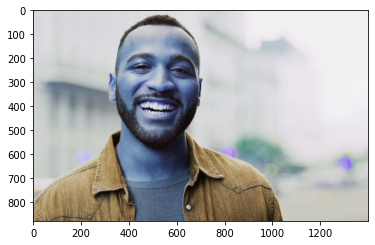

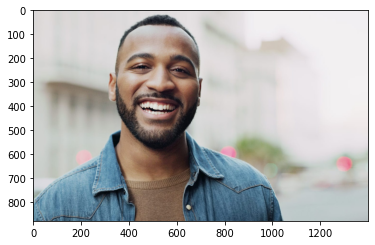

In [15]:
img=cv2.imread(os.path.join(data_dir,'Happy','05-12-21-happy-people.jpg'))
#this is the normal output of the data using the imshow
plt.imshow(img)
plt.show()
#this is the corrected the color
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

Loading the dataset

In [16]:
#this is to create the image dataset using the keras pipelines it has lot of features you can have a look into it
data=tf.keras.utils.image_dataset_from_directory(data_dir)
print(data) #it will display the details of the image 

#convert the keras files into an numpy array
data_iterator=data.as_numpy_iterator()
print(data_iterator)#it will says it has formed the numpy iterator

#create the numpy array as we want
batch=data_iterator.next()
print(batch[1]) #this batch wil sperate your data as the x and y and it will be helpful 

Found 171 files belonging to 2 classes.
<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
[0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1]


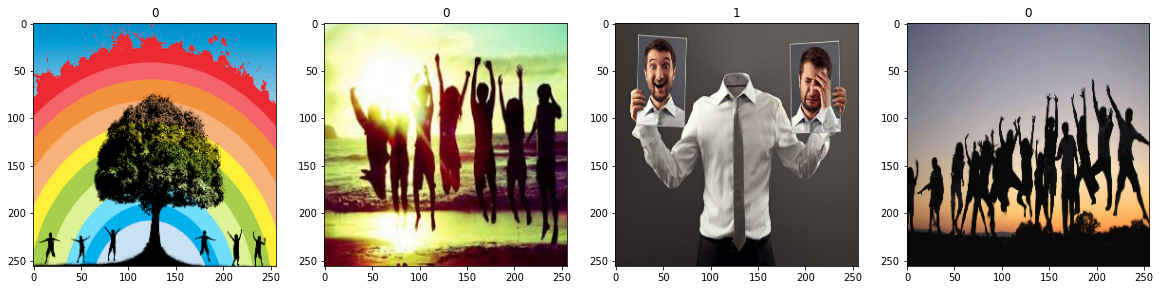

In [17]:
#From this i could able to get the information about the data 0 --> Happy and 1--->Sad
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

### Now lets try to do some preprocessing techniques to make the data smoother

Scale the dataset it can be performed in two ways i will show you things one by one

In [18]:
#the one way of performing scales as we done in the machine learning
scaled_batch=batch[0]/255
print(scaled_batch)

[[[[0.         0.56078434 0.7947687 ]
   [0.         0.56143725 0.79509807]
   [0.         0.5627432  0.7941157 ]
   ...
   [0.         0.56143725 0.7947687 ]
   [0.         0.5627432  0.7941157 ]
   [0.         0.56143725 0.7947687 ]]

  [[0.         0.5647059  0.79607844]
   [0.         0.5647059  0.79607844]
   [0.         0.5647059  0.79607844]
   ...
   [0.         0.5647059  0.79607844]
   [0.         0.5647059  0.79607844]
   [0.         0.5647059  0.79607844]]

  [[0.         0.56733304 0.7987056 ]
   [0.         0.56733304 0.7987056 ]
   [0.         0.56733304 0.7987056 ]
   ...
   [0.         0.56733304 0.7987056 ]
   [0.         0.56733304 0.7987056 ]
   [0.         0.56733304 0.7987056 ]]

  ...

  [[0.6049709  0.74232155 0.27568167]
   [0.6024835  0.7380821  0.27281517]
   [0.50031406 0.61403954 0.22384344]
   ...
   [0.9996764  0.9408529  0.22352941]
   [0.99870557 0.93988204 0.22352941]
   [1.         0.9411765  0.22352941]]

  [[0.54701287 0.66857386 0.24703775]
   [0.5

In [19]:
#we can use the data pipeline to take the output as well
data_t=data.map(lambda x,y:(x/255,y))
scaled_data=data_t.as_numpy_iterator().next()
print("The minimum value of the scaled data",scaled_data[0].min())
print("The maximum value of the scaled data",scaled_data[0].max())

The minimum value of the scaled data 0.0
The maximum value of the scaled data 1.0


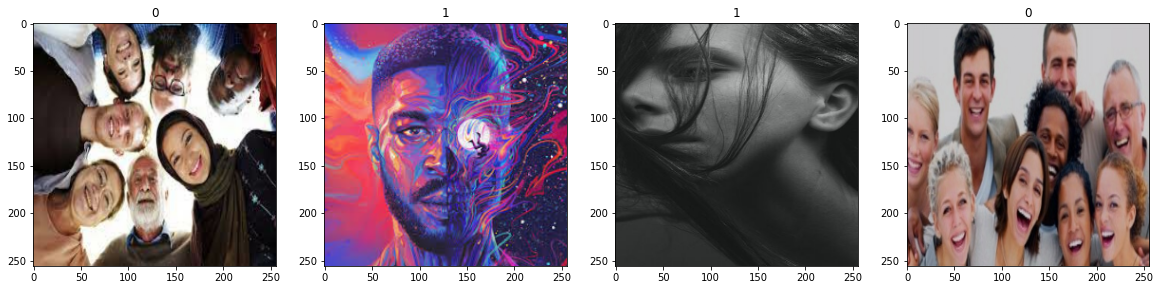

In [20]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(scaled_data[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(scaled_data[1][idx])

Splitting the data into train validation and test split

In [21]:
len(data_t)

6

In [22]:
train_size=int(len(data_t)*.7)
val_size=int(len(data_t)*.2)
test_size=int(len(data_t)*.1)+1

In [23]:
train=data_t.take(train_size)
val=data_t.skip(train_size).take(val_size)
test=data_t.skip(train_size+val_size).take(test_size)

### Building the deeplearnig model

In [24]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D

In [25]:
model=Sequential()

In [26]:
#The basic image classification model
model.add(Conv2D(16,(3,3),1,input_shape=(256,256,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='sigmoid'))
model.add(Dense(1,activation='softmax'))



In [27]:
#here i have used the adam optimizer and loss is being tha binary cross entropy and metrics is accuracy
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Now we have created the model by using the model we need to train the dataset

In [29]:
log_dir='/content/drive/MyDrive/Deep_Learning/Image_Classification/Logs'

In [30]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [31]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 13s 1s/step - loss: 0.7609 - accuracy: 0.4297 - val_loss: 0.6131 - val_accuracy: 0.5312
Epoch 2/20
4/4 [==============================] - 4s 695ms/step - loss: 0.6189 - accuracy: 0.4531 - val_loss: 0.5777 - val_accuracy: 0.4688
Epoch 3/20
4/4 [==============================] - 4s 695ms/step - loss: 0.5435 - accuracy: 0.4609 - val_loss: 0.4397 - val_accuracy: 0.4062
Epoch 4/20
4/4 [==============================] - 5s 908ms/step - loss: 0.4792 - accuracy: 0.4375 - val_loss: 0.3524 - val_accuracy: 0.5312
Epoch 5/20
4/4 [==============================] - 5s 909ms/step - loss: 0.3932 - accuracy: 0.4531 - val_loss: 0.4557 - val_accuracy: 0.4062
Epoch 6/20
4/4 [==============================] - 5s 911ms/step - loss: 0.4849 - accuracy: 0.4688 - val_loss: 0.3590 - val_accuracy: 0.6562
Epoch 7/20
4/4 [==============================] - 5s 909ms/step - loss: 0.3823 - accuracy: 0.4688 - val_loss: 0.3643 - val_accuracy: 0.4062
Epoch 8/20
4/4 [======

Now lets try to check the performance of the model

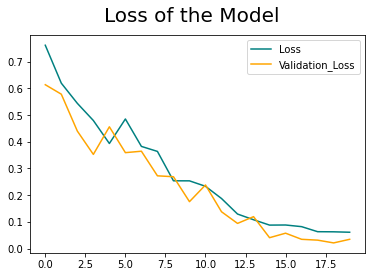

In [32]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='Loss')
plt.plot(hist.history['val_loss'],color='orange',label='Validation_Loss')
fig.suptitle('Loss of the Model',fontsize=20)
plt.legend()
plt.show()


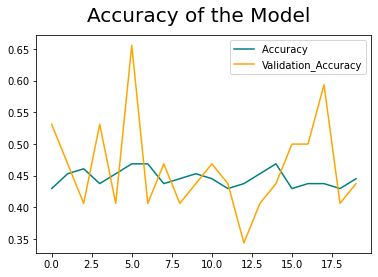

In [33]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='Accuracy ')
plt.plot(hist.history['val_accuracy'],color='orange',label='Validation_Accuracy')
fig.suptitle('Accuracy of the Model',fontsize=20)
plt.legend()
plt.show()


As per the notice form here i need more data to train the model and here i have only used the 130 datas for this prediction which could not able to differentiate the models speratly

### Now lets try to use this model for the test data

### since this is an classification problem so we can use the precision,Recall,BinaryAccuracy

In [34]:
from keras.metrics import Precision,Recall,BinaryAccuracy
pre=Precision()
rec=Recall()
ba=BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)
  pre.update_state(y,yhat)
  rec.update_state(y,yhat)
  ba.update_state(y,yhat)
print(f'the Precision value is{pre.result().numpy()} the Recall value is {rec.result().numpy()} the BinaryAccuray is {ba.result().numpy()}')

1/1 [==============================] - 0s 283ms/step
the Precision value is0.27272728085517883 the Recall value is 1.0 the BinaryAccuray is 0.27272728085517883


### **Save the model**

In [41]:
dir='/content/drive/MyDrive/Deep_Learning/Image_Classification/Model'

In [40]:
model.save(os.path.join(dir,'sadhappy.h5'))

In [39]:
from keras.models import load_model
newmodel=load_model(os.path.join('model','sadhappy.h5'))